# Tarea pandas

Ejercicio hecho por Cédric Prieels.

## Archivo CSV de poblaciones

In [274]:
import numpy as np
import pandas as pd

#First of all, let's open the CSV file we downloaded and keep the data in a data frame
df = pd.read_csv('Centroides_NucleosPoblacion.csv')
print(df.head())

   FID  OBJECTID      Cod_INE     Texto  Poblacion  CodMun Municipio  \
0    0         1  35002000101   Agüimes    29431.0   35002   Agüimes   
1    1         2  35003000201   Antigua    10458.0   35003   Antigua   
2    2         3  35004000301  Arrecife    58156.0   35004  Arrecife   
3    3         4  35006000202    Arucas    36745.0   35006    Arucas   
4    4         5  35009000303    Gáldar    24473.0   35009    Gáldar   

   Cod_Provin   Provincia          X          Y  
0          35  Las Palmas -15.446012  27.900542  
1          35  Las Palmas -14.013301  28.418966  
2          35  Las Palmas -13.551451  28.960649  
3          35  Las Palmas -15.521512  28.117496  
4          35  Las Palmas -15.654111  28.143873  


¿Cuántos Municipios tienen más de 100000 habitantes?. ¿Cuál es la segunda ciudad más poblada?. ¿Qué posición ocupa Granada en el ranking de las más pobladas?.

In [74]:
municipios = df[df['Poblacion'] > 100000]['Poblacion'].count()
print("Hay " + str(municipios) + " municipios con más de 100000 habitantes.")

print("\n\nLa segunda ciudad más poblada es...")
largest = df.sort_values(by="Poblacion", ascending=False) #To order the data frame by Poblacion in descending order
print(largest[1:2]) #Let's display all the data we have about this city

print("\n\nPosición de Granada...")
df["Rango"] = df['Poblacion'].rank(ascending=False) #Let's add one column at the end of the dataframe containing the rank of the city based on the Poblacion value
df[df["Municipio"] == "Granada"]['Rango'] #And let's now display the rango value for the city of Granada

Hay 62 municipios con más de 100000 habitantes.


La segunda ciudad más poblada es...
     FID  OBJECTID     Cod_INE      Texto  Poblacion  CodMun  Municipio  \
623  623       624  8019000101  Barcelona  1619337.0    8019  Barcelona   

     Cod_Provin  Provincia         X          Y  Rango  
623           8  Barcelona  2.176349  41.384247    2.0  


Posición de Granada...


272    18.0
Name: Rango, dtype: float64

Escriba los nombres de los 10 municipios con menos población.

In [84]:
#Let's use the new column Rango we previously defined for this
print("10 municipios con menos población...")
df_sorted = df.sort_values(by='Rango', ascending=False)[0:10] #We only want the first 10 results
print(df_sorted['Municipio'])

10 municipios con menos población...
307         Zumarraga
115    Caldas de Reis
168           Amurrio
746    Premià de Dalt
525             Buñol
97           Bembibre
503             Ocaña
193               Sax
841     San Fulgencio
756     San Bartolomé
Name: Municipio, dtype: object


¿Cuántos municipios de León tienen más de 6000 habitantes?.

In [97]:
municipios = df.loc[(df['Provincia'] == "León") & (df['Poblacion'] > 6000)]['Municipio'].count()
print("Hay " + str(municipios) + " municipios de León que tienen más de 6000 habitantes.")

Hay 9 municipios de León que tienen más de 6000 habitantes.


¿Cuál es el municipio situado más al Norte? (Usar el valor de la coordenada "Y" que representa la latitud en grados). Proporcione también la provincia a la que pertenece y su población.

In [107]:
print("El municipio más al Norte es...")
df_sorted = df.sort_values(by='Y', ascending=False)[['Provincia', 'Municipio', 'Poblacion', 'Y']][0:1]
print(df_sorted)

El municipio más al Norte es...
    Provincia Municipio  Poblacion          Y
104      Lugo   Viveiro    16211.0  43.625578


¿Cual es el municipio de la provincia de Cantabria situado más al Este?. ¿Cual es el situado más al Oeste?.

In [112]:
print("El municipio de Cantabria más al Este es...") #Cantabria is on the west of the Greenwich meridian, so the one that has the largest X value (since they should all be negative)
df_sorted = df[df['Provincia'] == 'Cantabria'].sort_values(by='X', ascending=False)[['Provincia', 'Municipio', 'Poblacion', 'X']][0:1]
print(df_sorted)

print("\n\nEl municipio de Cantabria más al Oeste es...")
df_sorted = df[df['Provincia'] == 'Cantabria'].sort_values(by='X', ascending=True)[['Provincia', 'Municipio', 'Poblacion', 'X']][0:1]
print(df_sorted)

El municipio de Cantabria más al Este es...
     Provincia        Municipio  Poblacion         X
464  Cantabria  Castro-Urdiales    32258.0 -3.216038


El municipio de Cantabria más al Oeste es...
     Provincia Municipio  Poblacion         X
468  Cantabria   Reinosa    10277.0 -4.138583


Dígame los nombres de los Municipios más cercano y más lejano a Madrid. Para ello debe calcular la distancia en todos ellos y Madrid. Por supuesto, Madrid no cuenta.

In [167]:
#The calculation of the distance between geographic coordinates is based on the following formula: https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
from math import sin, cos, sqrt, atan2, radians

#First, let's keep the X and Y values for Madrid in global variables
xMadrid = df[df['Municipio'] == "Madrid"]['X'].values[0]
yMadrid = df[df['Municipio'] == "Madrid"]['Y'].values[0]
print("Coordinates of Madrid: (" + str(xMadrid) + "," + str(yMadrid) + ")\n")

#Let's add a new column in our data frame that we will call DistanciaAMadrid and that we need to compute for all the cities
#For this, we define a function that gives back the distance from the coordinates of the cities considered
def distancia_a_madrid(lat, long):
    """
    All the arguments must be given in degrees, since this is what we have in our data frame.
    Gives back the distance between the cities of the data frame and Madrid in kilometers
    """
    
    R = 6373.0 #Approximate radius of earth in km
    
    lat1 = radians(lat)
    long1 = radians(long)
    lat2 = radians(xMadrid)
    long2 = radians(yMadrid)

    dlong = long2 - long1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlong / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

#Let's now apply our function to all the rows of the data frame using the lambda function
df['DistanciaAMadrid'] = df[['X', 'Y']].apply(lambda x: distancia_a_madrid(x[0], x[1]), axis=1) #x[0] correspond to the latitude in this case
print(df['DistanciaAMadrid'].head())

#Now we just need to order the new values and select the first and last rows (excluding Madrid)
df_sorted = df.sort_values(by='DistanciaAMadrid', ascending=True)

print("\nThe closest city to Madrid is... ")
print(df_sorted.iloc[1]) #We select the element 1 instead of 0 to avoid selecting Madrid itself

print("\nThe furthest city to Madrid is... ")
print(df_sorted.iloc[-1])

Coordinates of Madrid: (-3.7037970760000003,40.4166300011)

0    1892.873278
1    1745.977476
2    1668.131165
3    1881.481446
4    1889.529925
Name: DistanciaAMadrid, dtype: float64

The closest city to Madrid is... 
FID                                             783
OBJECTID                                        784
Cod_INE                                 28115002300
Texto               Humera-Somosaguas-prado del Rey
Poblacion                                     14800
CodMun                                        28115
Municipio                        Pozuelo de Alarcón
Cod_Provin                                       28
Provincia                                    Madrid
X                                          -3.78385
Y                                           40.4288
Rango                                           579
DistanciaAMadrid                            9.00583
Name: 783, dtype: object

The furthest city to Madrid is... 
FID                                     29
O

¿Cuántos Municipios hay en un radio de 5 grados de la ciudad de Barcelona?.

In [173]:
#The "5 degrees radius" being not completely defined, let's select the cities having a delta(latitude) < 5 degrees and a delta(longitude) < 5 degrees as well (giving us a square of length 5 degrees)

#First, let's keep the X and Y values for Barcelona
xBarcelona = df[df['Municipio'] == "Barcelona"]['X'].values[0]
yBarcelona = df[df['Municipio'] == "Barcelona"]['Y'].values[0]
print("Coordinates of Barcelona: (" + str(xBarcelona) + "," + str(yBarcelona) + ")")

df_output = df.loc[(df['X'] > xBarcelona - 5) & (df['X'] < xBarcelona + 5) & (df['Y'] > yBarcelona - 5) & (df['Y'] < yBarcelona + 5)]
#Let's now count the results and display them
print("\nHay " + str(df_output['Municipio'].count()) + " municipios a menos de 5 grados de Barcelona.")

Coordinates of Barcelona: (2.176349275,41.3842466401)

Hay 391 municipios a menos de 5 grados de Barcelona.


Obtenga la media, mediana, desviación estándar, valor máximo y valor mínimo de la población de los municipios de la provincia de Cantabria.

In [177]:
pob_cantabria = df.loc[(df['Provincia'] == "Cantabria")]
print(df_cantabria['Poblacion'].describe())

count        14.000000
mean      31246.285714
std       45088.684837
min       10277.000000
25%       11610.750000
50%       14322.000000
75%       28981.000000
max      181589.000000
Name: Poblacion, dtype: float64


Usando los métodos de agregación, calcular las poblaciones de cada provincia.

In [195]:
#Let's group the data frame by provincia and sum the poblacion
df_prov = df.loc[:,['Provincia', 'Poblacion']].groupby('Provincia').agg(['sum'])
print(df_prov)

                        Poblacion
                              sum
Provincia                        
A Coruña                 818982.0
Alacant/Alicante        1804252.0
Albacete                 280673.0
Almería                  550604.0
Asturias                 965777.0
Badajoz                  361700.0
Barcelona               4934795.0
Burgos                   250766.0
Cantabria                437448.0
Castelló/Castellón       476388.0
Ceuta                     80579.0
Ciudad Real              348364.0
Cuenca                    71921.0
Cáceres                  176220.0
Cádiz                   1166531.0
Córdoba                  590503.0
Girona                   474739.0
Granada                  604357.0
Guadalajara              139373.0
Guipúzcoa                546141.0
Huelva                   361777.0
Huesca                   124838.0
Illes Balears           1041183.0
Jaén                     426169.0
La Rioja                 203911.0
Las Palmas              1220407.0
León          

Dibujar el valor de la población para las diferentes ciudades (usar las funciones vistas en MatPlotLib). Hacer un gráfico equivalente pero para las diferentes provincias. Seleccionar un punto representativo de las ciudades incluidas en cada provincia.

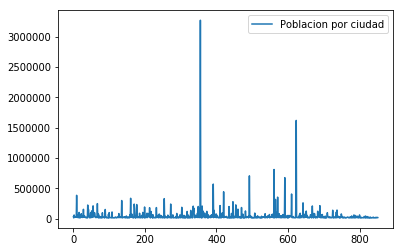

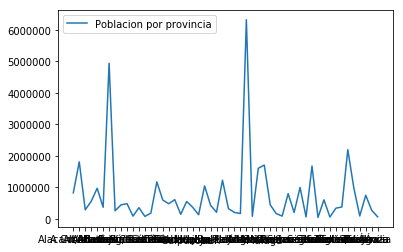

In [202]:
import matplotlib.pyplot as pyplot
%matplotlib inline

pyplot.plot(df.index, df['Poblacion'])
pyplot.legend(['Poblacion por ciudad'])
pyplot.show()

pyplot.plot(df_prov.index, df_prov['Poblacion'])
pyplot.legend(['Poblacion por provincia'])
pyplot.show()

## Series Temporales

Los ficheros precip.csv y precip.stn contienen los datos de precipitación diaria de los años 2000-2010 para 86 estaciones meteorológicas distribuidas por Europa. Leer ambos ficheros utilizando las funciones correspondientes de PANDAS y realizar lo siguiente:

Obtener y exporta en csv los datos asociados a las series mensuales, estacionales y anuales

In [362]:
import numpy as np
import pandas as pd

#First of all, let's open the csv file we downloaded and keep the data in a data frame
df = pd.read_csv('precip.csv', parse_dates=[0], index_col = 0, sep=r'\s*,\s*') #The parse dates argument is telling to python that we have dates in the first column of the csv file
df_stn = pd.read_csv('precip.stn', index_col = 0, sep=r'\s*,\s*') #This separator is needed since, without it, most of the columns have a space character in their name
print(df.head())

#We are now ready to start the resampling
df_day = df.resample('D').sum()
df_month = df.resample('M').sum()
df_q = df.resample('Q').sum()
df_year = df.resample('Y').sum()
print(df_year.head())

#Export the csv files from the data frames just created
df_day.to_csv('day.csv')
df_month.to_csv('month.csv')
df_q.to_csv('q.csv')
df_year.to_csv('year.csv')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


            000012  000013  000014  000015  000016  000017  000021  000028  \
YYYYMMDD                                                                     
2000-01-01     0.0     3.8     3.7    13.4     7.3     1.0     0.0     3.1   
2000-01-02     0.0     0.0     0.0     3.9     1.6     0.8     0.8     6.6   
2000-01-03     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.1   
2000-01-04     0.0     0.0     2.0     1.1     0.4    10.9     0.0     1.7   
2000-01-05     0.0     0.0     1.3     1.7     0.0     0.0     0.0     0.1   

            000029  000030   ...    002062  002762  003919  003946  003991  \
YYYYMMDD                     ...                                             
2000-01-01     0.1     0.7   ...      27.5     2.6     0.0     0.0     0.9   
2000-01-02     4.4     3.6   ...       0.0     0.0     0.0     0.0     0.0   
2000-01-03     1.8     0.7   ...       0.0     0.0     0.0     0.0     0.1   
2000-01-04     7.6     4.4   ...       0.7     0.2     0.0     

Dibujar la serie temporal asociada al promedio espacial de los datos mensuales, estacionales y anuales.

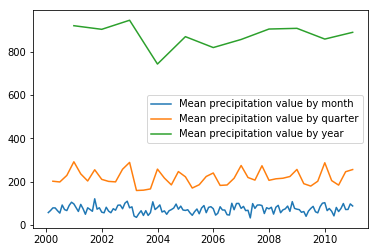

In [237]:
import matplotlib.pyplot as pyplot
%matplotlib inline

pyplot.plot(df_month.index, df_month.mean(axis=1))
pyplot.plot(df_q.index, df_q.mean(axis=1))
pyplot.plot(df_year.index, df_year.mean(axis=1))
pyplot.legend(['Mean precipitation value by month', 'Mean precipitation value by quarter', 'Mean precipitation value by year'])
pyplot.show()

Dibujar la distribución espacial de las estaciones, así como los valores promedio y máximo.

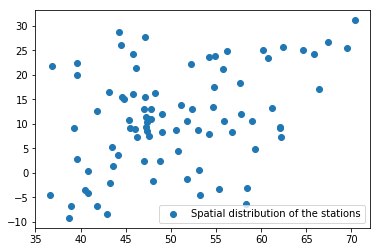

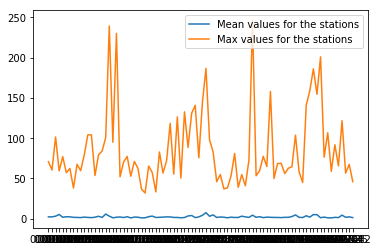

In [348]:
#The geographical data is kept in the stn file for each station
pyplot.scatter(df_stn['latitude'], df_stn['longitude']) #Spatial distribution of the stations
pyplot.legend(['Spatial distribution of the stations'])
pyplot.show()

#We now need to join the two data frames. For this, let's rename the index of df_stn so that it matches the column names of df
df_t = df.transpose() #Let's put the station id of df as the index, as in the other data frame
#The station id does not have the same format in both df. Let's fix it now.
"""
df_t.index = df_t.index.astype('str')
df_stn.index = df_stn.index.astype('str')
df_stn.index = df_stn.index.str.zfill(6) #Add leading zeros to the second dataframe

#Let's now join both data frames into a new one
df_new = df_t.join(df_stn)
print(df_new.head())
"""

pyplot.plot(df_t.index, df_t.mean(axis=1))
pyplot.plot(df_t.index, df_t.max(axis=1))
pyplot.legend(['Mean values for the stations', 'Max values for the stations'])
pyplot.show()

Calcular la frecuencia de días con precipitaciones mayores (>) de 1 mm.

In [372]:
df_day_na = df_day[df_day > 1] #Let's convert values <= 1mm to na to use the isna() function afterwards
print((df_day_na.isna().sum()/df_day.sum()*100)) #Gives back the percentage of days having precipitations > 1mm for each station

000012    32.108140
000013    28.412337
000014    19.522138
000015     8.495928
000016    39.193076
000017    29.791191
000021    30.951984
000028    39.582698
000029    41.440669
000030    48.350799
000032    34.237169
000038    42.480362
000039    62.121158
000042    34.072458
000048    19.727740
000054    42.683655
000058     8.757289
000059    24.892001
000062    72.622868
000063    43.535758
000107    29.758664
000113    46.592978
000173    31.685400
000175    79.302326
000176    46.657801
000177    41.497467
000190    78.568949
000191    63.490430
000192    29.010067
000194    16.952266
            ...    
000351    41.317044
000355    15.705230
000450    41.743501
000462    25.599239
000465    51.643520
000468    31.388291
000483    38.332102
000708    41.919797
000800    46.397807
000951    54.820352
001009    37.391174
001020    44.144323
001051    23.852004
001394    13.217206
001427    38.588255
001662    51.857623
001684    18.942911
001686    38.355968
001687    12.943330
